<a href="https://colab.research.google.com/github/Dicarvajalb/AlgorithmsUN2021I/blob/main/Laboratories/Lab14/dicarvajalbAlgorithmicToolboxWeek6Group14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Maximum Amount of Gold#

In [ ]:
%%writefile Maximum_Amount_of_Gold.cpp
#include <iostream>
#include <vector>

using std::vector;
using std::max;

int optimal_weight(int W, const vector<int> &w) {
  
  vector<vector<int> > matrix(W + 1, vector<int>(w.size() + 1));
  for(int i = 0; i <= W; i++){
      for(int j = 0; j <= w.size() ; j++){
      	 matrix[i][j] = 0;
  		}
  }
  
  for(int i = 1; i <= W; i++){
      for(int j = 1; j <= w.size(); j++){
   			
            if (w[j-1]<=i) {
				matrix[i][j] = max(matrix[i][j-1], matrix[i-w[j-1]][j-1] + w[j-1]);
        	} else {
        		matrix[i][j] = matrix[i][j-1];
			}
                
	   }
  }
  return matrix[W][w.size()];
}

int main() {
  int n, W;
  std::cin >> W >> n;
  vector<int> w(n);
  for (int i = 0; i < n; i++) {
    std::cin >> w[i];
  }
  std::cout << optimal_weight(W, w) << '\n';
}

Overwriting Maximum_Amount_of_Gold.cpp


In [ ]:
!g++ Maximum_Amount_of_Gold.cpp -o Maximum_Amount_of_Gold
!./Maximum_Amount_of_Gold

10 3
1 4 8
9


#Partitioning Souvenirs#

In [ ]:
%%writefile Partitioning_Souvenirs.cpp
#include <iostream>
#include <vector>

using std::vector;
using std::max;

int partition3(int sum, int n, vector<int> &A) {
	int count = 0; 
    int matrix[sum +1][n +1];
    
    for(int i = 0; i <= sum; i++){
      for(int j = 0; j <= n; j++){
      		matrix[i][j] = 0;
		}
	}
    
   for(int i = 1; i <= sum; i++){
      for(int j = 1; j <= n; j++){
            if (A[j-1]<=i){
            	matrix[i][j] = max(matrix[i][j-1],matrix[i-A[j-1]][j-1] + A[j-1]) ;            
			}  else{
				matrix[i][j] = matrix[i][j-1];
			}      
            if (matrix[i][j] == sum){
            	count += 1;
			} 
		}
	}
    if (count < 3 ){
    	return 0;
	} else{
		return 1;
	}
}

int main() {
  int n;
  std::cin >> n;
  vector<int> A(n);
  int sum = 0;
  for (size_t i = 0; i < A.size(); ++i) {
    std::cin >> A[i];
    sum += A[i];
  }
  if (n<3){
  	std::cout << 0 << '\n';
  } else if (sum % 3 != 0){
  	std::cout << 0 << '\n';
  } else{
  	std::cout << partition3(sum/3, n, A) << '\n';
  }
  
}

Writing Partitioning_Souvenirs.cpp


In [ ]:
!g++ Partitioning_Souvenirs.cpp -o Partitioning_Souvenirs
!./Partitioning_Souvenirs

4
3 3 3 3
0


In [ ]:
!g++ Partitioning_Souvenirs.cpp -o Partitioning_Souvenirs
!./Partitioning_Souvenirs

1
40
0


In [ ]:
!g++ Partitioning_Souvenirs.cpp -o Partitioning_Souvenirs
!./Partitioning_Souvenirs

11
17 59 34 57 17 23 67 1 18 2 59
1


In [ ]:
!g++ Partitioning_Souvenirs.cpp -o Partitioning_Souvenirs
!./Partitioning_Souvenirs

13
1 2 3 4 5 5 7 7 8 10 12 19 25
1


#Maximum Value of an Arithmetic Expression#

In [ ]:
%%writefile Maximum_Value_of_an_Arithmetic_Expression.cpp
#include <iostream>
#include <stdio.h>
#include <cassert>
#include <string>
#include <vector>
#include <limits>
#include <cstring>


using std::vector;
using std::string;
using std::max;
using std::min;

long long eval(long long a, long long b, char op) {
  if (op == '*') {
    return a * b;
  } else if (op == '+') {
    return a + b;
  } else if (op == '-') {
    return a - b;
  } else {
    assert(0);
  }
}

vector<int> MinAndMax(vector<vector<int> > matrix_max, vector<vector<int> > matrix_min, int i, int j, string signs[]) {
  vector<int> values(2);
  int min_value = std::numeric_limits<int>::max();
  int max_value =  - std::numeric_limits<int>::max();
  for(int k = i; k < j - 1; k++){
      char character[2];
      strcpy(character, signs[k].c_str());
      int a = eval(matrix_max[i][k], matrix_max[k + 1][j],character[0]);
      int b = eval(matrix_max[i][k], matrix_min[k + 1][j],character[0]);
      int c = eval(matrix_min[i][k], matrix_max[k + 1][j],character[0]);
      int d = eval(matrix_min[i][k], matrix_min[k + 1][j],character[0]);
      min_value = min(min_value,min(a,min(b,min(c,d))));
      max_value = max(max_value,max(a,max(b,max(c,d))));
  }
  values[0] = min_value;
  values[1] = max_value;
  return values;
}

long long get_maximum_value(const string &exp){
  int n =(exp.size()+1)/2;
  vector<vector<int> > matrix_max(n,vector<int>(n));
  vector<vector<int> > matrix_min(n,vector<int>(n));
  int numbers[n];
  string signs[exp.size() - n];
  int cont = 0; 
  for(int i = 0; i < exp.size(); i++){
      if(i%2 == 0){
       matrix_max[cont][cont] = exp[i];
       matrix_min[cont][cont] = exp[i];
       numbers[cont] = exp[i];
      }else{
          signs[cont] = exp[i];
      }
      cont++;
  }
  for(int s = 1; s < n - 1; s++){
      for(int i = 1; i < n - s; s++){
          int j = i + s;
          vector<int> results = MinAndMax(matrix_max, matrix_min, i, j, signs);
          matrix_min[i][j] = results[0];
          matrix_max[i][j] = results[1];
      }
  }
  return (long long)matrix_max[1][n - 1];
}

int main() {
  string s;
  std::cin >> s;
  std::cout << get_maximum_value(s) << '\n';
  std::cout << "Hola" << '\n';
}

Overwriting Maximum_Value_of_an_Arithmetic_Expression.cpp


In [ ]:
!g++ Maximum_Value_of_an_Arithmetic_Expression.cpp -o Maximum_Value_of_an_Arithmetic_Expression
!./Maximum_Value_of_an_Arithmetic_Expression

1+5


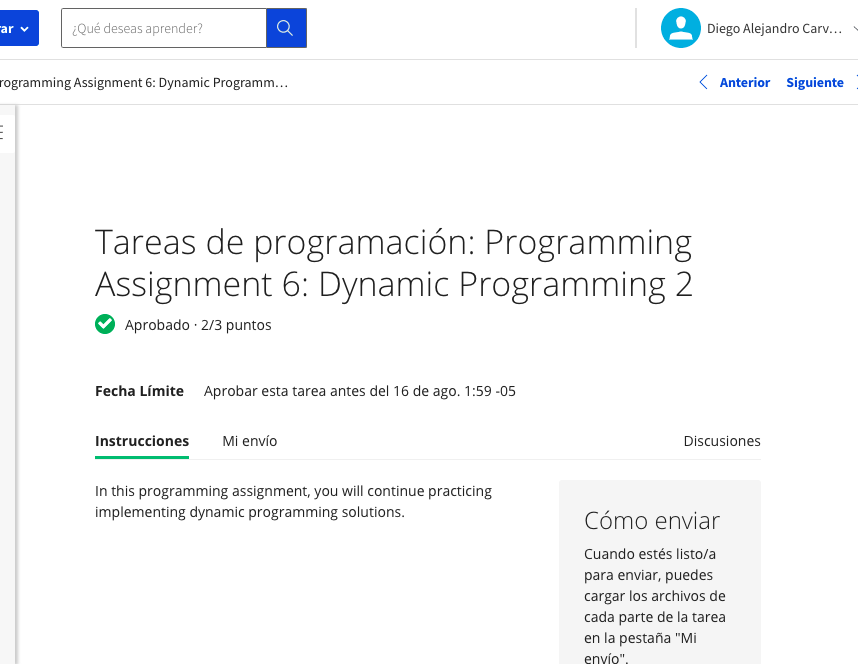